In [121]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Wczytanie danych i krótki przegląd

In [122]:
data = pd.read_csv("messy_data.csv",na_values=' ')

In [123]:
data.head()

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.5,IF,D,Ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.7,vvs2,E,premium,5.7,NaN,3.52,62.0,59.0,4500.0
2,NaN,Si2,h,Good,4.3,4.31,NaN,62.3,56.0,700.0
3,1.2,if,d,ideal,NaN,6.82,4.20,61.7,58.0,10000.0
4,0.9,I1,J,Fair,6.0,NaN,3.70,61.7,NaN,2400.0


In [124]:
data.columns = data.columns.str.replace(' ', '')

In [125]:
data.describe(include='all')

,carat,clarity,color,cut,xdimension,ydimension,zdimension,depth,table,price
count,150.000000,200,200,200,197.000000,136.000000,152.000000,133.000000,167.000000,196.000000
unique,NaN,14,15,12,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,i1,G,Premium,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,26,36,34,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.799000,NaN,NaN,NaN,5.885787,5.829706,3.694671,62.316541,56.910180,11410.714286
std,0.321827,NaN,NaN,NaN,0.770172,0.767402,0.462431,0.326408,1.421972,40072.669086
min,0.200000,NaN,NaN,NaN,3.900000,3.890000,2.410000,61.200000,54.000000,500.000000
25%,0.512500,NaN,NaN,NaN,5.300000,5.290000,3.350000,62.100000,56.000000,2600.000000
50%,0.750000,NaN,NaN,NaN,5.900000,5.850000,3.715000,62.300000,57.000000,4350.000000
75%,1.050000,NaN,NaN,NaN,6.500000,6.512500,4.082500,62.600000,58.000000,7900.000000


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       150 non-null    float64
 1   clarity     200 non-null    object 
 2   color       200 non-null    object 
 3   cut         200 non-null    object 
 4   xdimension  197 non-null    float64
 5   ydimension  136 non-null    float64
 6   zdimension  152 non-null    float64
 7   depth       133 non-null    float64
 8   table       167 non-null    float64
 9   price       196 non-null    float64
dtypes: float64(7), object(3)
memory usage: 15.8+ KB


Czyszczenie

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       150 non-null    float64
 1   clarity     200 non-null    object 
 2   color       200 non-null    object 
 3   cut         200 non-null    object 
 4   xdimension  197 non-null    float64
 5   ydimension  136 non-null    float64
 6   zdimension  152 non-null    float64
 7   depth       133 non-null    float64
 8   table       167 non-null    float64
 9   price       196 non-null    float64
dtypes: float64(7), object(3)
memory usage: 15.8+ KB


In [128]:
print('Duplicate rows:', data.duplicated().sum())

Duplicate rows: 0


In [129]:
data.value_counts(data['carat'])

carat
0.50    13
0.55    12
0.40    10
0.45     9
0.65     8
0.70     8
0.75     8
1.05     8
0.60     7
1.30     7
0.85     7
0.90     7
0.95     6
1.20     6
1.15     5
1.40     5
1.25     4
0.80     4
1.10     4
0.35     4
1.00     2
1.35     2
1.50     1
0.20     1
0.30     1
1.60     1
Name: count, dtype: int64

In [130]:
data.value_counts(data['clarity'])

clarity
 i1      26
 VVS1    23
 si2     23
 IF      20
 VVS2    19
 si1     18
 vvs2    18
 Si2     16
 Si1     12
 vvs1    11
 I1       5
 SI2      5
 if       3
 Vvs1     1
Name: count, dtype: int64

In [131]:
data['clarity'] = data['clarity'].str.upper()

In [132]:
data.value_counts(data['color'])

color
 G            36
 I            33
 H            30
 F            24
 D            13
 E            13
 e            12
 d             9
 colorless     6
 f             6
 j             6
 g             4
 h             4
 Colorless     2
 J             2
Name: count, dtype: int64

In [133]:
data['color'] = data['color'].str.upper()

In [134]:
data.value_counts(data['cut'])

cut
 Premium      34
 Good         30
 fair         24
 Ideal        23
 good         21
 very good    19
 Fair         12
 Very good    10
 Very Good     9
 ideal         9
 premium       7
 very Good     2
Name: count, dtype: int64

In [135]:
data['cut'] = data['cut'].str.upper()

In [136]:
data.value_counts(data['price'])

price
2600.0      7
2500.0      5
2300.0      5
7900.0      5
2200.0      5
           ..
600.0       1
6000.0      1
6400.0      1
6700.0      1
350000.0    1
Name: count, Length: 89, dtype: int64

In [137]:
data.columns

Index(['carat', 'clarity', 'color', 'cut', 'xdimension', 'ydimension',
       'zdimension', 'depth', 'table', 'price'],
      dtype='object')

In [138]:
print('Unique values in categorical columns:')
for col in data.select_dtypes(include=['object']).columns:
    print(col, data[col].unique())

Unique values in categorical columns:
clarity [' IF' ' VVS2' ' SI2' ' I1' ' SI1' ' VVS1']
color [' D' ' E' ' H' ' J' ' G' ' F' ' I' ' COLORLESS']
cut [' IDEAL' ' PREMIUM' ' GOOD' ' FAIR' ' VERY GOOD']


In [139]:
data.describe(include='all')

,carat,clarity,color,cut,xdimension,ydimension,zdimension,depth,table,price
count,150.000000,200,200,200,197.000000,136.000000,152.000000,133.000000,167.000000,196.000000
unique,NaN,6,8,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,SI2,G,GOOD,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,44,40,51,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.799000,NaN,NaN,NaN,5.885787,5.829706,3.694671,62.316541,56.910180,11410.714286
std,0.321827,NaN,NaN,NaN,0.770172,0.767402,0.462431,0.326408,1.421972,40072.669086
min,0.200000,NaN,NaN,NaN,3.900000,3.890000,2.410000,61.200000,54.000000,500.000000
25%,0.512500,NaN,NaN,NaN,5.300000,5.290000,3.350000,62.100000,56.000000,2600.000000
50%,0.750000,NaN,NaN,NaN,5.900000,5.850000,3.715000,62.300000,57.000000,4350.000000
75%,1.050000,NaN,NaN,NaN,6.500000,6.512500,4.082500,62.600000,58.000000,7900.000000


In [140]:
data.head()

,carat,clarity,color,cut,xdimension,ydimension,zdimension,depth,table,price
0,0.5,IF,D,IDEAL,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.7,VVS2,E,PREMIUM,5.7,NaN,3.52,62.0,59.0,4500.0
2,NaN,SI2,H,GOOD,4.3,4.31,NaN,62.3,56.0,700.0
3,1.2,IF,D,IDEAL,NaN,6.82,4.20,61.7,58.0,10000.0
4,0.9,I1,J,FAIR,6.0,NaN,3.70,61.7,NaN,2400.0


In [141]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['clarity', 'color', 'cut']


In [142]:
missing_values_count = data.isna().sum()
missing_values_count

carat         50
clarity        0
color          0
cut            0
xdimension     3
ydimension    64
zdimension    48
depth         67
table         33
price          4
dtype: int64

In [143]:
#Minimalne wartości dla x, y i z wynoszą tutaj 0, ale nie jest to możliwe. ponieważ są to długość, szerokość i głębokość
data = data.drop(data[data["xdimension"]==0].index)
data = data.drop(data[data["ydimension"]==0].index)
data = data.drop(data[data["zdimension"]==0].index)

In [144]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge

In [145]:
data.describe()

,carat,xdimension,ydimension,zdimension,depth,table,price
count,150.000000,197.000000,136.000000,152.000000,133.000000,167.000000,196.000000
mean,0.799000,5.885787,5.829706,3.694671,62.316541,56.910180,11410.714286
std,0.321827,0.770172,0.767402,0.462431,0.326408,1.421972,40072.669086
min,0.200000,3.900000,3.890000,2.410000,61.200000,54.000000,500.000000
25%,0.512500,5.300000,5.290000,3.350000,62.100000,56.000000,2600.000000
50%,0.750000,5.900000,5.850000,3.715000,62.300000,57.000000,4350.000000
75%,1.050000,6.500000,6.512500,4.082500,62.600000,58.000000,7900.000000
max,1.600000,7.300000,7.280000,4.500000,63.000000,60.000000,350000.000000


In [146]:
# Pozbywam się wartości NaN i zastępuję je wynikami metodą IterativeImputer( model RandomForestRegressor)

data_numeric = data.select_dtypes(include='number')
imp = IterativeImputer(estimator=RandomForestRegressor())
data_imputed = pd.DataFrame(imp.fit_transform(data_numeric), columns=data_numeric.columns)
data[data_numeric.columns] = data_imputed


c:\Users\Michal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [147]:
data.describe()

,carat,xdimension,ydimension,zdimension,depth,table,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.798718,5.886420,5.887149,3.645932,62.331400,56.860450,11288.100000
std,0.303241,0.768663,0.769142,0.476637,0.284244,1.362643,39686.214041
min,0.200000,3.900000,3.890000,2.410000,61.200000,54.000000,500.000000
25%,0.550000,5.300000,5.302700,3.290000,62.200000,56.000000,2600.000000
50%,0.750000,5.900000,5.890000,3.641250,62.380000,57.000000,4300.000000
75%,1.050000,6.500000,6.522950,4.040000,62.500000,58.000000,7900.000000
max,1.600000,7.300000,7.280000,4.500000,63.000000,60.000000,350000.000000


In [148]:
data.head()

,carat,clarity,color,cut,xdimension,ydimension,zdimension,depth,table,price
0,0.5000,IF,D,IDEAL,5.1,5.1500,3.2000,61.5,57.23,3000.0
1,0.7000,VVS2,E,PREMIUM,5.7,5.6845,3.5200,62.0,59.00,4500.0
2,0.3105,SI2,H,GOOD,4.3,4.3100,2.6892,62.3,56.00,700.0
3,1.2000,IF,D,IDEAL,6.8,6.8200,4.2000,61.7,58.00,10000.0
4,0.9000,I1,J,FAIR,6.0,6.0155,3.7000,61.7,54.84,2400.0


In [149]:
data.to_csv('data_cleaned.csv',index=False)

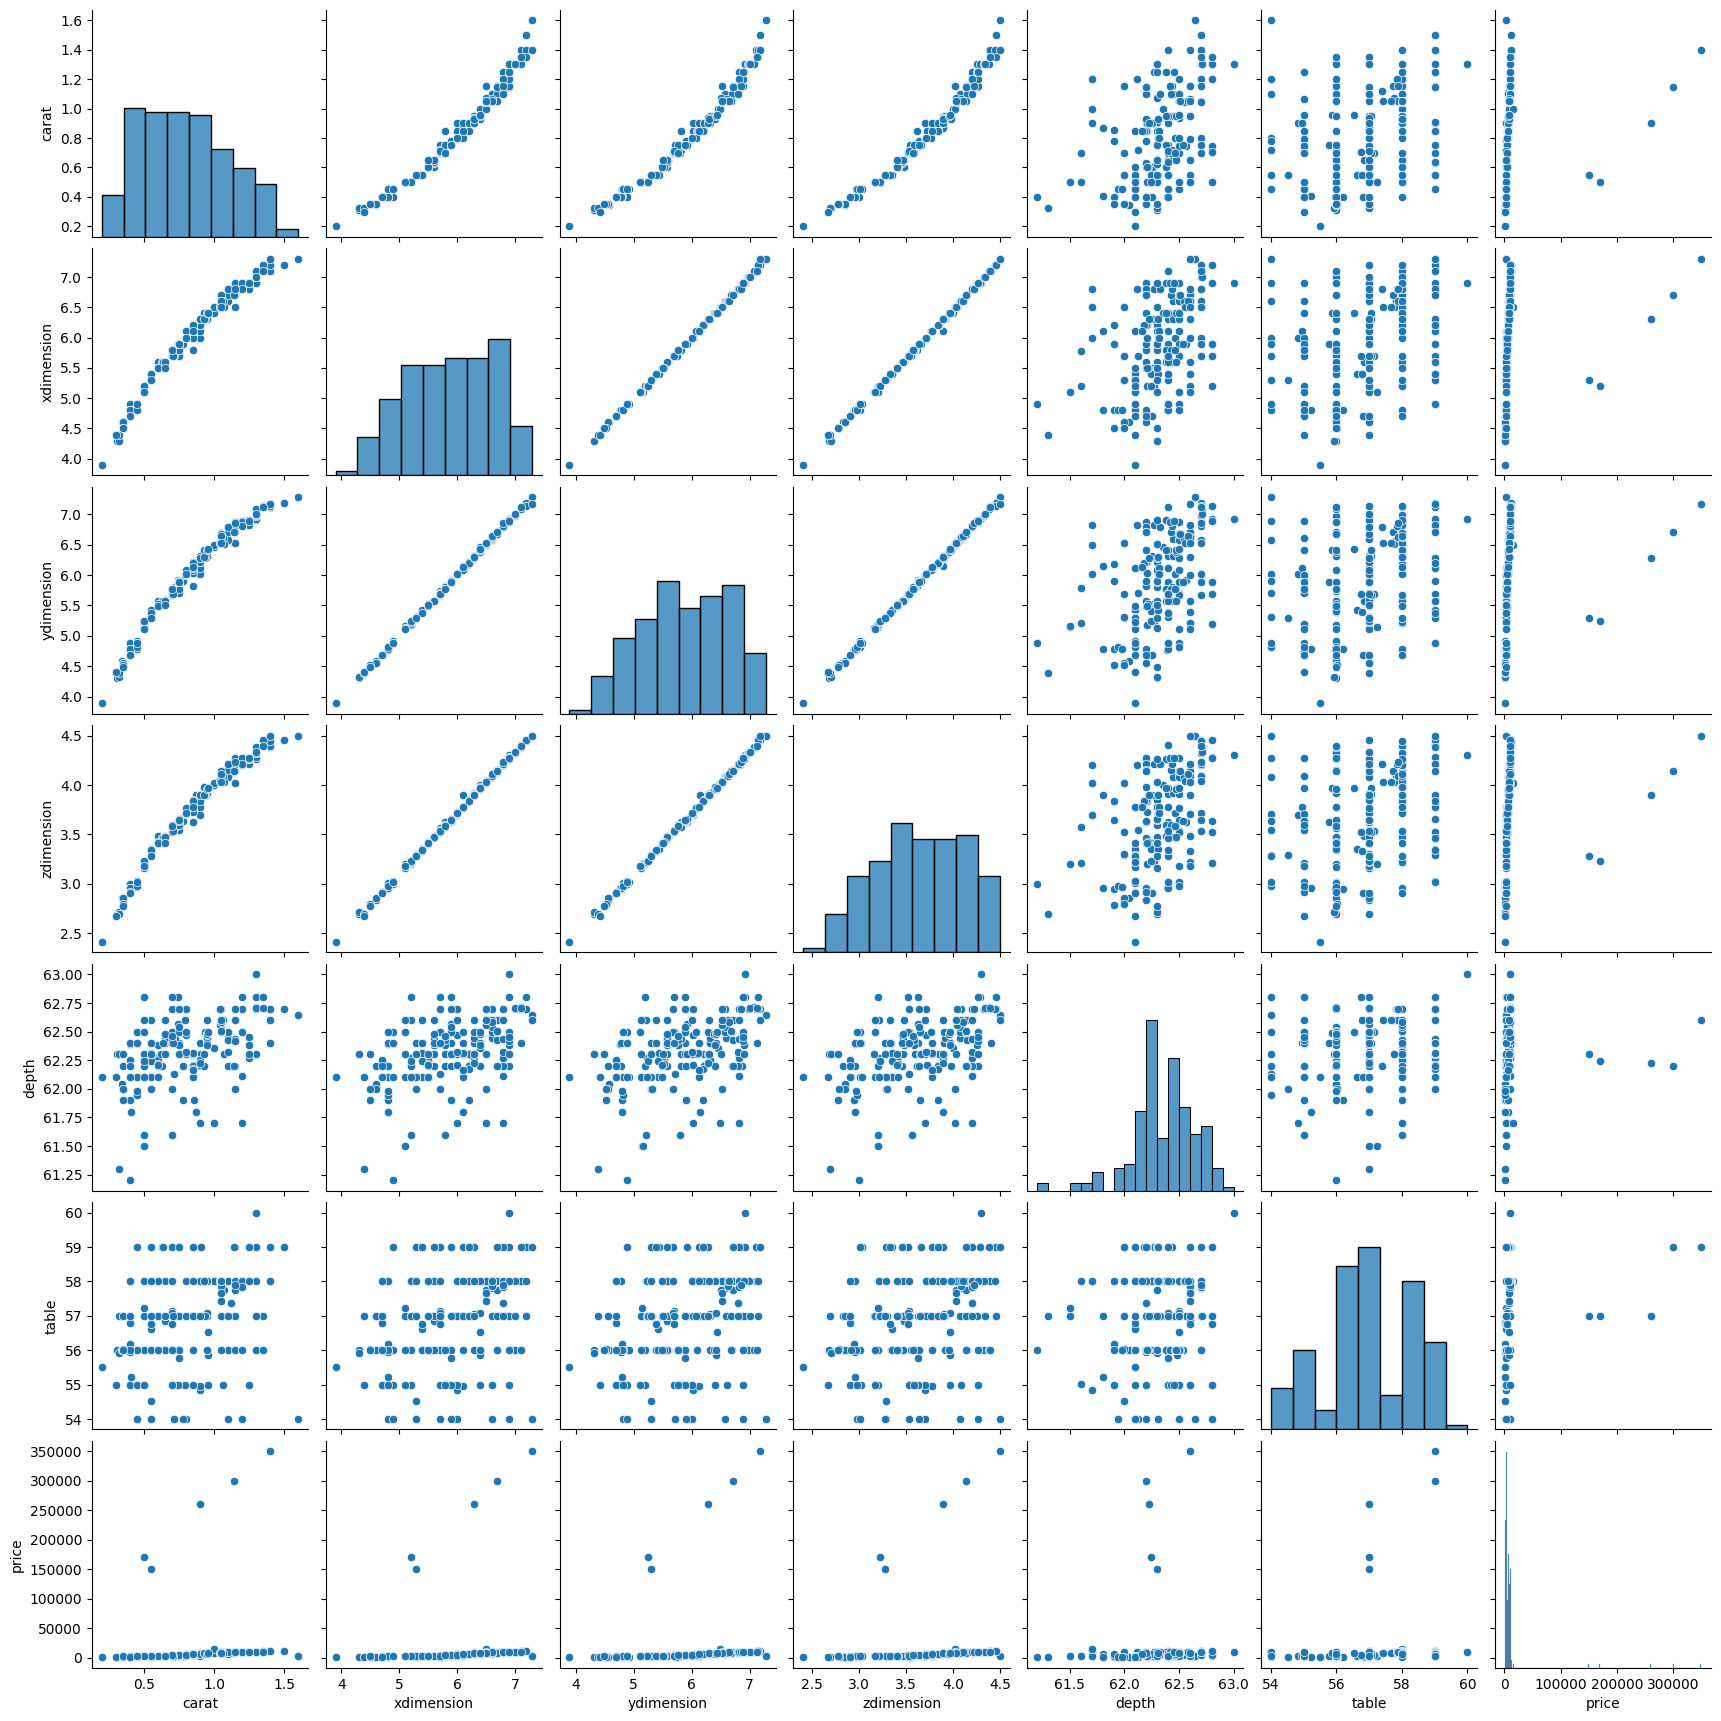

In [150]:
ax=sns.pairplot(data)

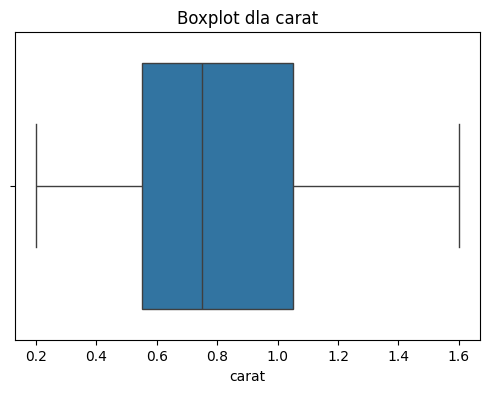

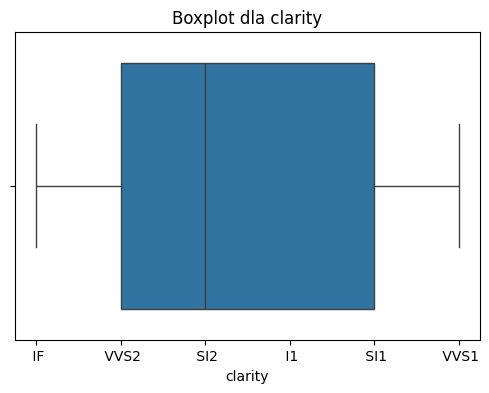

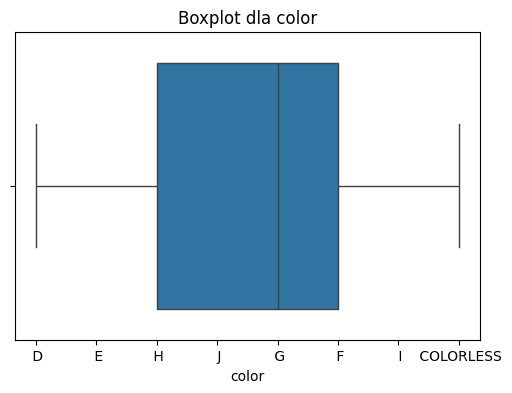

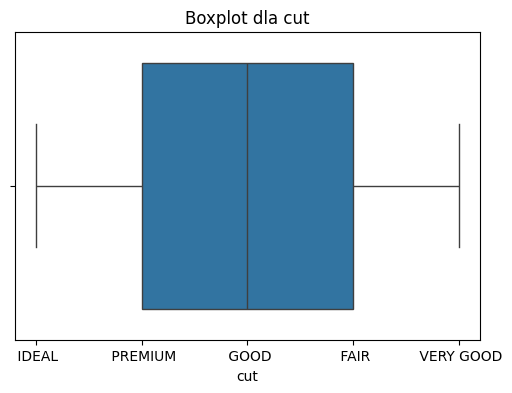

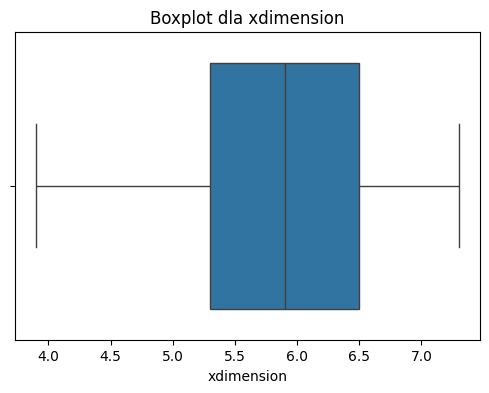

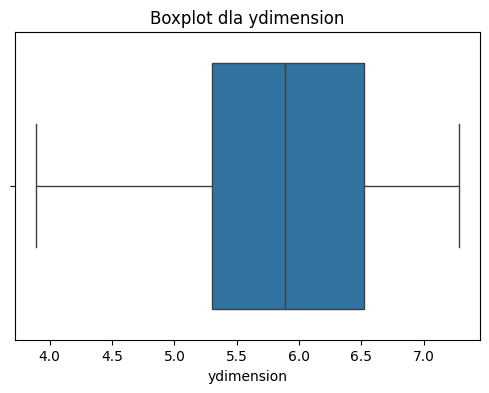

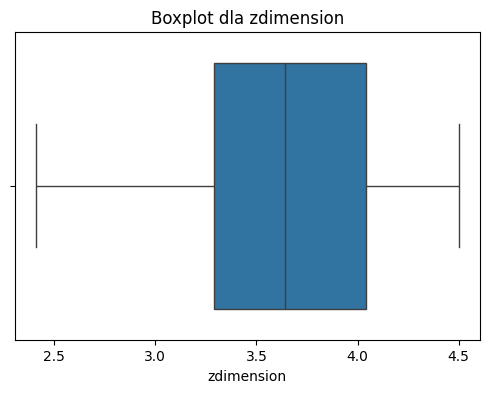

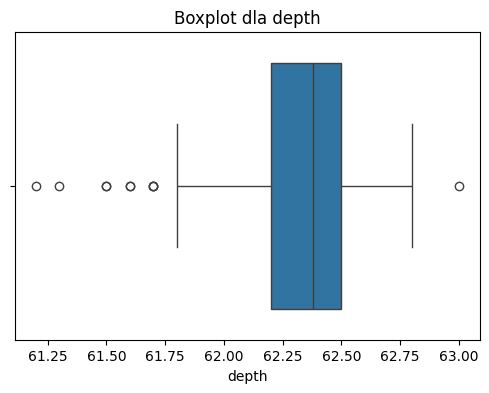

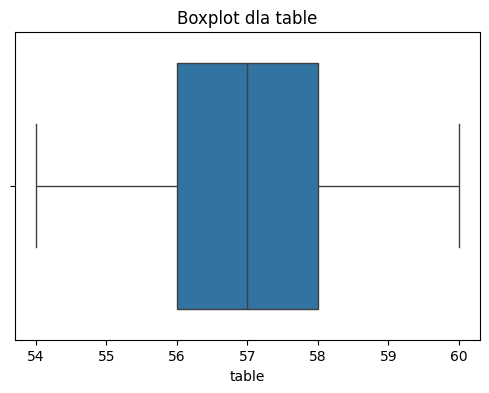

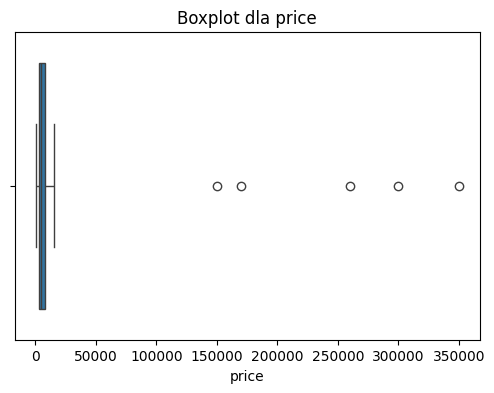

In [151]:
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])  
    plt.title(f'Boxplot dla {column}')
    plt.show()

In [152]:
for column_name in data_numeric:
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Usuwamy wartości odstające
    data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]

In [153]:
data.to_csv('data_no_outliers.csv',index=False)

In [154]:
data.describe(include = 'all')

,carat,clarity,color,cut,xdimension,ydimension,zdimension,depth,table,price
count,185.000000,185,185,185,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
unique,NaN,6,8,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,SI2,G,GOOD,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,43,36,50,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.799586,NaN,NaN,NaN,5.890811,5.891368,3.648912,62.367054,56.821622,5270.708108
std,0.299763,NaN,NaN,NaN,0.761771,0.763825,0.472390,0.224765,1.355087,3106.393502
min,0.200000,NaN,NaN,NaN,3.900000,3.890000,2.410000,61.800000,54.000000,500.000000
25%,0.550000,NaN,NaN,NaN,5.400000,5.380000,3.330000,62.200000,56.000000,2600.000000
50%,0.750000,NaN,NaN,NaN,5.900000,5.890000,3.642500,62.400000,57.000000,4300.000000
75%,1.050000,NaN,NaN,NaN,6.500000,6.520600,4.040000,62.500000,58.000000,7800.000000


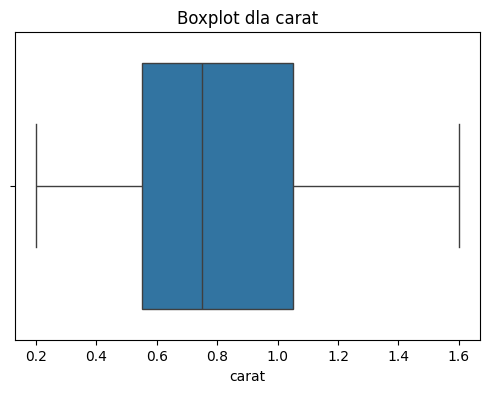

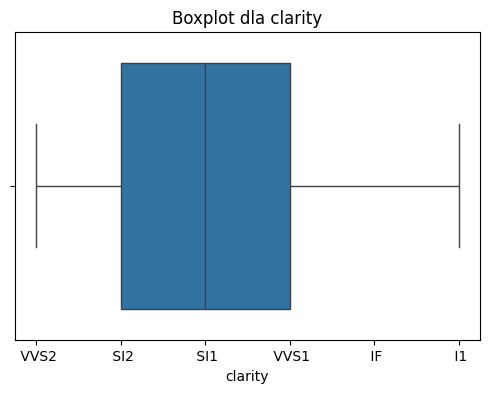

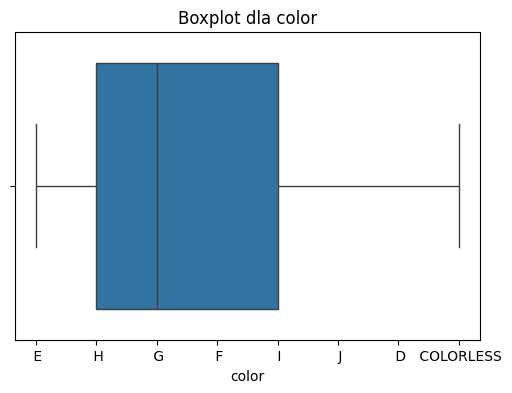

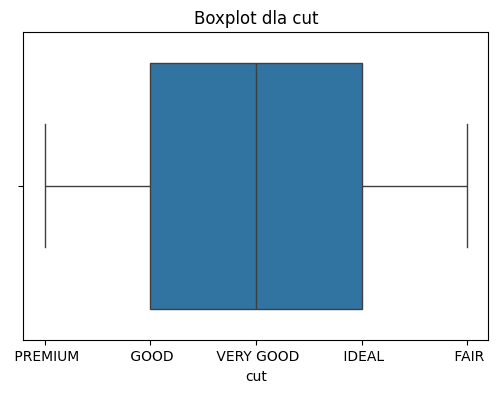

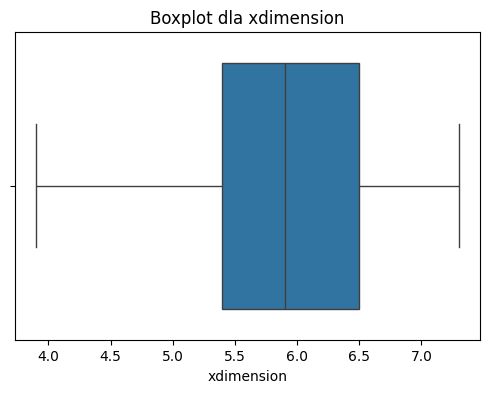

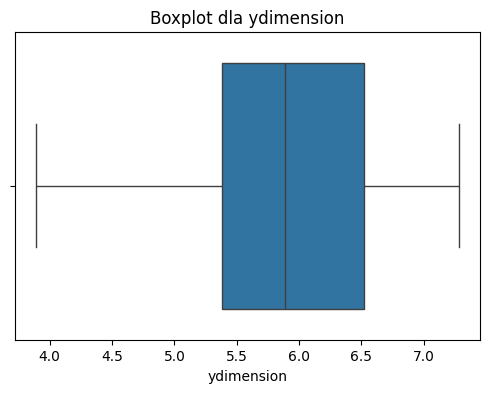

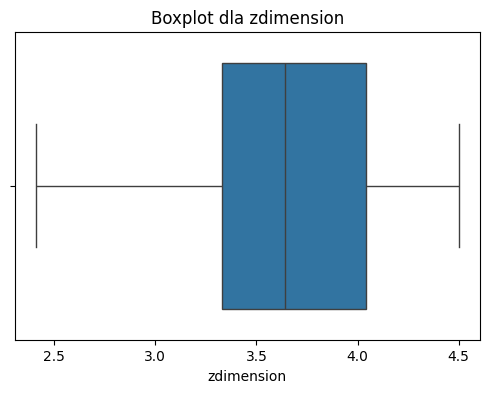

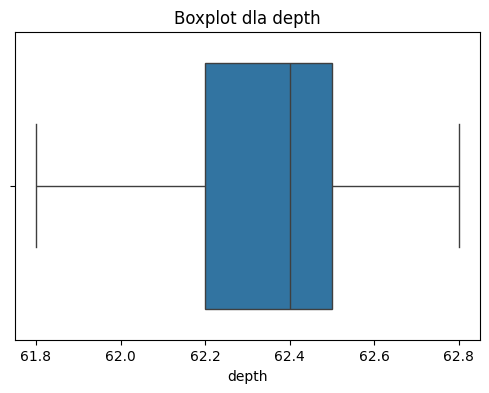

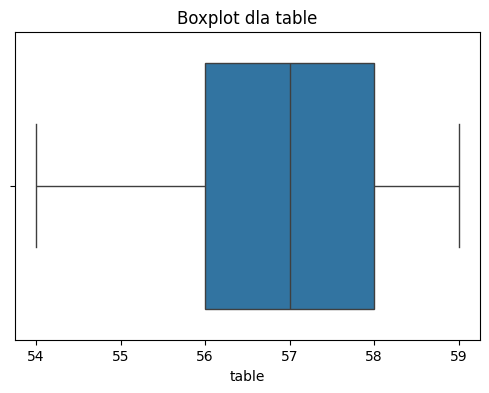

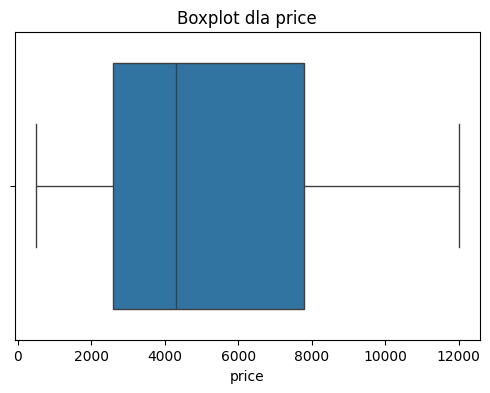

In [155]:
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])  
    plt.title(f'Boxplot dla {column}')
    plt.show()

In [156]:
data.describe()

,carat,xdimension,ydimension,zdimension,depth,table,price
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,0.799586,5.890811,5.891368,3.648912,62.367054,56.821622,5270.708108
std,0.299763,0.761771,0.763825,0.472390,0.224765,1.355087,3106.393502
min,0.200000,3.900000,3.890000,2.410000,61.800000,54.000000,500.000000
25%,0.550000,5.400000,5.380000,3.330000,62.200000,56.000000,2600.000000
50%,0.750000,5.900000,5.890000,3.642500,62.400000,57.000000,4300.000000
75%,1.050000,6.500000,6.520600,4.040000,62.500000,58.000000,7800.000000
max,1.600000,7.300000,7.280000,4.500000,62.800000,59.000000,12000.000000


Wizualizacje

In [157]:
import plotly.express as px

In [158]:
for column in data.columns:
    fig = px.histogram(data, x=column, marginal='box', nbins=30, title=f'Histogram - {column}')
    fig.show()

In [159]:
import plotly.express as px

for column in data.columns[:-1]:
    fig = px.box(data, x=column, y='price')

    fig.update_layout(title=f'Boxplot - {column} i price', xaxis_title=column, yaxis_title='price')

    fig.show()


In [160]:
fig_cut = px.violin(data, x='cut', y='price', box=True, points="all", title="Violin Plot - Cut vs Price", color='cut')
fig_color = px.violin(data, x='color', y='price', box=True, points="all", title="Violin Plot - Color vs Price", color='color')
fig_clarity = px.violin(data, x='clarity', y='price', box=True, points="all", title="Violin Plot - Clarity vs Price", color='clarity')

fig_cut.update_layout(
    xaxis=dict(title="Cut"),
    yaxis=dict(title="Price"),
)

fig_color.update_layout(
    xaxis=dict(title="Color"),
    yaxis=dict(title="Price"),
)

fig_clarity.update_layout(
    xaxis=dict(title="Clarity"),
    yaxis=dict(title="Price"),
)

fig_cut.show()
fig_color.show()
fig_clarity.show()

In [161]:
import plotly.express as px

fig_cut = px.pie(data, names='cut', title='Pie Chart - Cut Distribution')
fig_color = px.pie(data, names='color', title='Pie Chart - Color Distribution')
fig_clarity = px.pie(data, names='clarity', title='Pie Chart - Clarity Distribution')

fig_cut.show()
fig_color.show()
fig_clarity.show()


In [162]:
import plotly.express as px

fig = px.scatter_3d(data, x='xdimension', y='ydimension', z='zdimension', color='price', opacity=0.5)

fig.update_layout(scene=dict(
                    xaxis=dict(title='X Dimension'),
                    yaxis=dict(title='Y Dimension'),
                    zaxis=dict(title='Z Dimension')
                ))

fig.show()


In [163]:
import plotly.express as px

fig = px.scatter(data, x='xdimension', y='ydimension', color='zdimension',
                 size='price', hover_data=['price'],
                 title='Filled Area Plot with Price',
                 opacity=0.5, 
                 size_max=40, 
                 )

fig.update_traces(mode='markers', marker=dict(line=dict(width=2, color='DarkSlateGray')))

fig.show()


One hot encoding

In [164]:
data.head()

,carat,clarity,color,cut,xdimension,ydimension,zdimension,depth,table,price
1,0.7000,VVS2,E,PREMIUM,5.7,5.6845,3.5200,62.000,59.00,4500.0
2,0.3105,SI2,H,GOOD,4.3,4.3100,2.6892,62.300,56.00,700.0
5,0.7425,SI1,G,VERY GOOD,5.9,5.9200,3.6300,62.566,57.00,4200.0
7,0.4000,VVS1,F,GOOD,4.8,4.7900,2.9500,61.905,56.19,1500.0
8,0.3230,SI2,I,GOOD,4.3,4.3200,2.7080,62.300,55.92,1081.0


In [165]:
diamond_clean_data =  pd.get_dummies(data, dtype=int)
diamond_clean_data.head()

,carat,xdimension,ydimension,zdimension,depth,table,price,clarity_ I1,clarity_ IF,clarity_ SI1,...,color_ F,color_ G,color_ H,color_ I,color_ J,cut_ FAIR,cut_ GOOD,cut_ IDEAL,cut_ PREMIUM,cut_ VERY GOOD
1,0.7000,5.7,5.6845,3.5200,62.000,59.00,4500.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.3105,4.3,4.3100,2.6892,62.300,56.00,700.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0.7425,5.9,5.9200,3.6300,62.566,57.00,4200.0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
7,0.4000,4.8,4.7900,2.9500,61.905,56.19,1500.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,0.3230,4.3,4.3200,2.7080,62.300,55.92,1081.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [166]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(diamond_clean_data[['carat','xdimension','ydimension','zdimension','depth','table']]),columns=['carat','xdimension','ydimension','zdimension','depth','table'],index=diamond_clean_data.index)

In [167]:
numericals.head()

,carat,xdimension,ydimension,zdimension,depth,table
1,-0.333119,-0.251163,-0.271567,-0.273634,-1.637490,1.611919
2,-1.636003,-2.093972,-2.075946,-2.037124,-0.299139,-0.607969
5,-0.190955,0.012096,0.037587,-0.040143,0.887531,0.131993
7,-1.336624,-1.435826,-1.445825,-1.483539,-2.061301,-0.467376
8,-1.594190,-2.093972,-2.062819,-1.997219,-0.299139,-0.667166


In [168]:
diamond_clean_data_standard = diamond_clean_data.copy(deep=True)
diamond_clean_data_standard[['carat','xdimension','ydimension','zdimension','depth','table']] = numericals[['carat','xdimension','ydimension','zdimension','depth','table']]

In [169]:
diamond_clean_data_standard.head()

,carat,xdimension,ydimension,zdimension,depth,table,price,clarity_ I1,clarity_ IF,clarity_ SI1,...,color_ F,color_ G,color_ H,color_ I,color_ J,cut_ FAIR,cut_ GOOD,cut_ IDEAL,cut_ PREMIUM,cut_ VERY GOOD
1,-0.333119,-0.251163,-0.271567,-0.273634,-1.637490,1.611919,4500.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.636003,-2.093972,-2.075946,-2.037124,-0.299139,-0.607969,700.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,-0.190955,0.012096,0.037587,-0.040143,0.887531,0.131993,4200.0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
7,-1.336624,-1.435826,-1.445825,-1.483539,-2.061301,-0.467376,1500.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,-1.594190,-2.093972,-2.062819,-1.997219,-0.299139,-0.667166,1081.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [170]:
diamond_clean_data_standard.to_csv('diamond_clean_data_standarized.csv',index=False)

In [171]:
import plotly.express as px
import plotly.figure_factory as ff

correlation_matrix = diamond_clean_data_standard.corr()

fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    colorscale='Viridis',
    annotation_text=correlation_matrix.round(2).values,
    showscale=True,
)

fig.update_layout(
    title="Correlation Matrix",
    xaxis=dict(title="Features"),
    yaxis=dict(title="Features"),
    autosize=False,
    width=1100,
    height=1100,
    font=dict(size=8),  
)

fig.show()


Trening modelu

In [172]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm


In [173]:
X = diamond_clean_data_standard.drop(["price"],axis=1)
y = diamond_clean_data_standard.price

In [174]:
X

,carat,xdimension,ydimension,zdimension,depth,table,clarity_ I1,clarity_ IF,clarity_ SI1,clarity_ SI2,...,color_ F,color_ G,color_ H,color_ I,color_ J,cut_ FAIR,cut_ GOOD,cut_ IDEAL,cut_ PREMIUM,cut_ VERY GOOD
1,-0.333119,-0.251163,-0.271567,-0.273634,-1.637490,1.611919,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.636003,-2.093972,-2.075946,-2.037124,-0.299139,-0.607969,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
5,-0.190955,0.012096,0.037587,-0.040143,0.887531,0.131993,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7,-1.336624,-1.435826,-1.445825,-1.483539,-2.061301,-0.467376,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,-1.594190,-2.093972,-2.062819,-1.997219,-0.299139,-0.667166,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.503136,0.670242,0.693963,0.660329,0.481565,-0.607969,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
195,-1.169373,-1.304197,-1.314549,-1.345780,0.146977,1.611919,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
196,1.506641,1.328388,1.313320,1.318347,0.392342,-1.347932,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
198,0.168634,0.275354,0.313265,0.278253,-0.905858,0.871956,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [175]:
R2_Scores = []

In [176]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

while len(X.columns) > 1:
    p_values = model.pvalues[1:]
    max_p_value = p_values.max()
    if max_p_value > 0.05: 
        remove_feature = p_values.idxmax()
        X = X.drop(remove_feature, axis=1)
        model = sm.OLS(y, X).fit()
    else:
        break

print(model.summary())  

residuals = model.resid
y_pred = model.predict(X)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     159.0
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           2.59e-84
Time:                        18:23:29   Log-Likelihood:                -1526.9
No. Observations:                 185   AIC:                             3078.
Df Residuals:                     173   BIC:                             3116.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3868.5798     54.432     71.

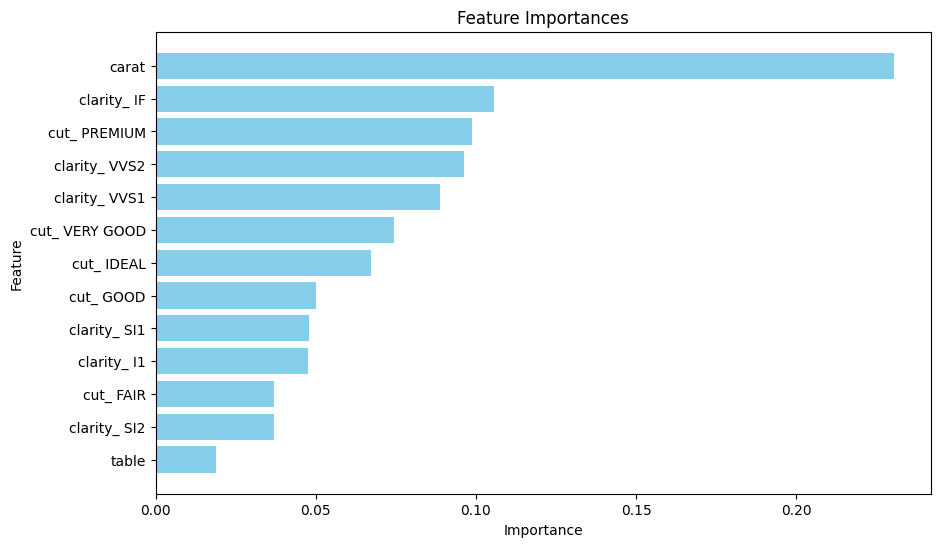

In [177]:
feature_importances = pd.DataFrame({'Feature': X.columns[1:], 'Coefficient': model.params[1:]})
feature_importances['Importance'] = np.abs(feature_importances['Coefficient']) / np.abs(feature_importances['Coefficient']).sum()
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_sorted['Feature'], feature_importances_sorted['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis() 
plt.show()

In [178]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import statsmodels.api as sm

viz_data = pd.DataFrame({'Fitted Values': model.fittedvalues, 'Residuals': model.resid})

scatter_plot = px.scatter(viz_data, x='Fitted Values', y='Residuals', labels={'Residuals': 'Residuals'})

scatter_plot.add_trace(go.Scatter(x=[min(viz_data['Fitted Values']), max(viz_data['Fitted Values'])],
                                  y=[0, 0],
                                  mode='lines',
                                  name='Zero Line',
                                  line=dict(color='red', dash='dash')))

scatter_plot.show()
